In [38]:
import numpy as np
import torch
import pandas as pd
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

# 加载测试数据
sequence_length = 16
num_classes = 69 # 66+2

df = pd.read_csv('test_data.csv')
# # print(df)
nrows, ncols = df.shape

X = df.iloc[:,0:sequence_length - 1].astype(int).values
X = np.reshape(X, (nrows, ncols-1, 1)) # 三维
y = df.iloc[:, sequence_length-1].astype(int).values
y = np.eye(num_classes)[y]
# print('X=', X)
# print('y=', y)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32)

In [ ]:
print(X)
print(y)

In [17]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

# 构建模型
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Model, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = Model(1, 16, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# 训练模型
for epoch in range(100):
    for batch_X, batch_y in dataloader:
        # 前向传播
        outputs = model(batch_X)
        loss = criterion(outputs, torch.max(batch_y, 1)[1])
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

# 预测下一次事件各个编号的出现概率
current_sequence = np.random.randint(num_classes, size=(1, sequence_length, 1))
current_sequence = torch.tensor(current_sequence, dtype=torch.float32)
print(current_sequence)
next_event_prob = model(current_sequence)
next_event_prob = nn.functional.softmax(next_event_prob, dim=1)
next_event_prob = next_event_prob.detach().numpy().flatten()
print(next_event_prob)

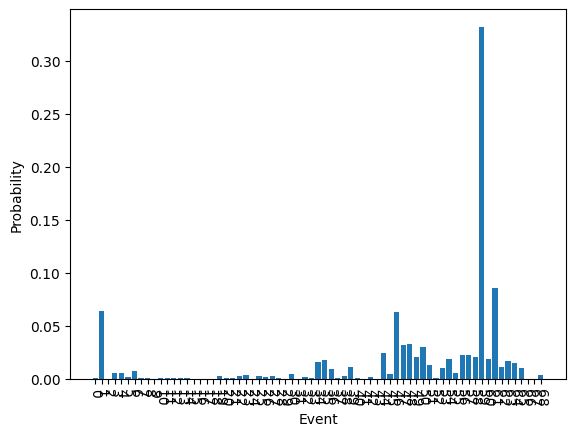

In [36]:
import matplotlib.pyplot as plt

# 绘制条形图
plt.bar(range(len(next_event_prob)), next_event_prob)
plt.xticks(range(len(next_event_prob)),  rotation='270')
plt.xlabel('Event')
plt.ylabel('Probability')
plt.show()